# Exploratory Data Analysis  
1. Source the data.  
2. Data Cleaning: Choose a Data Set of your choice and perform Data Cleaning process such as  
- Remove the NULL Values(Regression)
- Handle the missing values(Either drop the missing values/replace with mean/replace with median/replace with mode)
- Handle the Outliers( Use Box Plot, Drop or replace the outliers using IQR method.)

Justify the methods chosen at each step of cleaning

3. Visualize the data using univariate and bi-variate analysis(Use Histogram) 

Interpret the values of the graph and justify your analysis for the same.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("../dataset/Coffee_Shop_Sales.xlsx")

In [15]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
df.isnull().sum()

- We will remove the rows that don't contain product detail as we can't fill with random info.
- Fill the unit_price with the median value so we don't have any bias in price of the product.


In [ ]:
df = df.dropna(subset=["product_detail"])
df["unit_price"] = df["unit_price"].fillna(df["unit_price"].median())

df.isnull().sum()

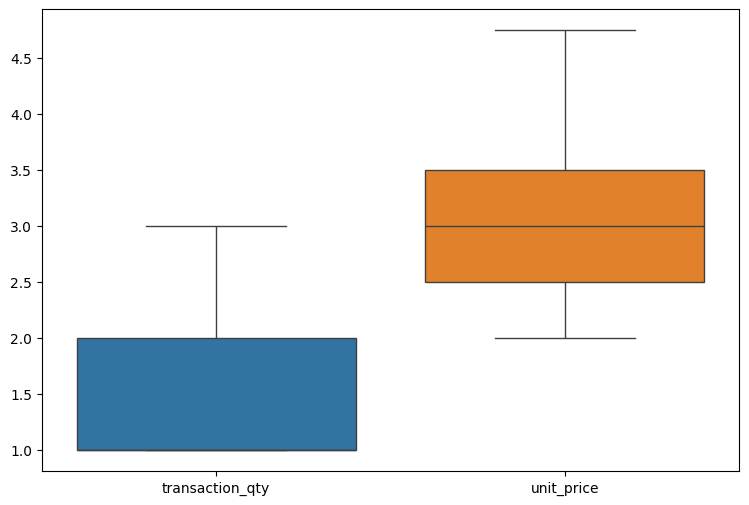

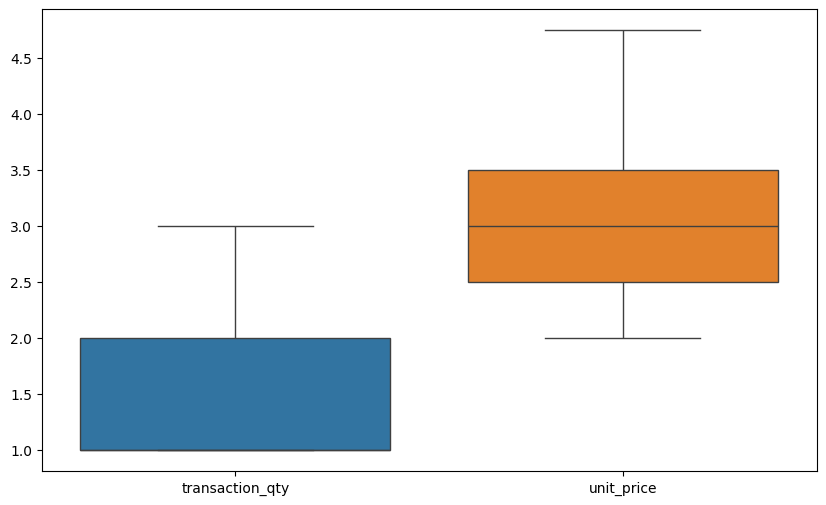

In [10]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df[["transaction_qty", "unit_price"]])
plt.show()

# function to handle outliers using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = df[column].median()

# applying the function to the 'transaction_qty' and 'unit_price' columns
handle_outliers(df, 'transaction_qty')
handle_outliers(df, 'unit_price')

# box plot after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['transaction_qty', 'unit_price']])
plt.show()

### Univariate Analysis 

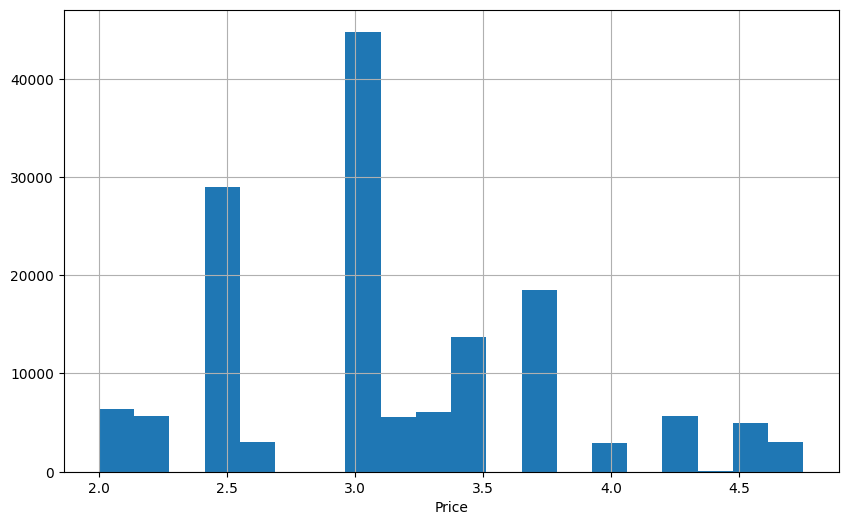

In [30]:
df['unit_price'].hist(bins=20, figsize=(10, 6))
plt.xlabel('Price')
plt.show()

### Bi-variate Analysis

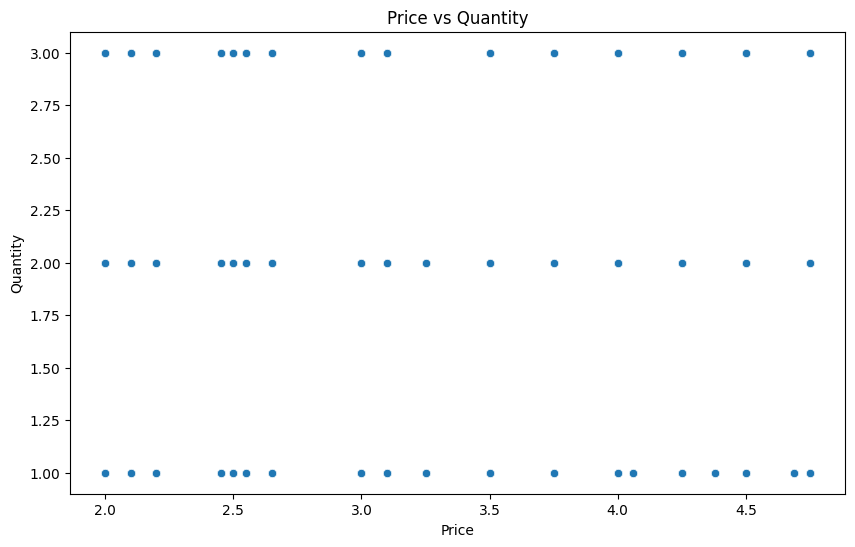

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unit_price', y='transaction_qty', data=df)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price vs Quantity')
plt.show()